# Exportaciones / Regresión con Redes Neuronales en R

# 1 Análisis Exploratorio de los Datos (EDA)

# 1.1 Carga de Librerías

In [ ]:
# Instalamos Keras y Tensorflow

install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("RANN")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("performanceEstimation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BBmisc’, ‘checkmate’, ‘parallelMap’




In [ ]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos las liberías a utilizar

library(dplyr)
library(keras)
library(caret)
library(RANN)
library(performanceEstimation)
library(Metrics)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




# 1.2 Carga de Datos

In [ ]:
# Cargamos los datos
archivo <- "/content/sample_data/Exportaciones.csv"
export <- read.csv(archivo)
head(export)

,Id.Empresas,Id.Frutas,Id.Cliente,Cantidad,Anio,Ventas.EEUU,Ventas.China,Ventas.Espana,Ventas.Francia,Ventas.Canada
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,6,1,1859,2017,2,3,1,3,4
2,2,6,5,1564,2015,5,3,2,3,2
3,4,5,5,1377,2014,5,3,2,2,1
4,2,5,5,1546,2018,3,4,3,3,3
5,7,2,1,1287,2019,5,3,1,2,5
6,7,6,4,2077,2017,5,4,2,3,2


In [ ]:
# Mostramos el número de filas y columnas
cat("export:", dim(export))

export: 16600 10

# 1.3 Estadística Descriptiva

In [ ]:
# Resumimos las variables numéricas y categóricas
summary(export)

  Id.Empresas      Id.Frutas       Id.Cliente       Cantidad         Anio     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   : 800   Min.   :2010  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:1203   1st Qu.:2012  
 Median :4.000   Median :4.000   Median :3.000   Median :1607   Median :2015  
 Mean   :4.004   Mean   :4.007   Mean   :2.999   Mean   :1603   Mean   :2015  
 3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:4.000   3rd Qu.:1998   3rd Qu.:2018  
 Max.   :7.000   Max.   :7.000   Max.   :5.000   Max.   :2400   Max.   :2020  
  Ventas.EEUU     Ventas.China   Ventas.Espana  Ventas.Francia Ventas.Canada 
 Min.   :1.000   Min.   :3.000   Min.   :1.00   Min.   :2.0    Min.   :1.00  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:1.00   1st Qu.:2.0    1st Qu.:2.00  
 Median :3.000   Median :3.000   Median :2.00   Median :2.5    Median :3.00  
 Mean   :2.988   Mean   :3.496   Mean   :2.01   Mean   :2.5    Mean   :3.01  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:3.00   3rd Qu.:3

In [ ]:
# Elaboramos la matriz de correlación
corr <- cor(export)
corr

,Id.Empresas,Id.Frutas,Id.Cliente,Cantidad,Anio,Ventas.EEUU,Ventas.China,Ventas.Espana,Ventas.Francia,Ventas.Canada
Id.Empresas,1.0000000000,-0.001034282,-0.0001485438,0.0121048240,0.003843669,-0.000497581,0.016560538,0.0061414850,-0.005434150,-0.003037466
Id.Frutas,-0.0010342824,1.000000000,0.0069634463,0.0008077170,-0.001785081,0.001332195,0.002414262,-0.0026258150,0.004916004,-0.007813777
Id.Cliente,-0.0001485438,0.006963446,1.0000000000,0.0180169272,-0.002626322,0.004130544,0.004601351,-0.0069802684,-0.005885987,0.007197351
Cantidad,0.0121048240,0.000807717,0.0180169272,1.0000000000,0.002424409,0.010221204,-0.008945558,-0.0003976284,-0.010379281,0.007001573
Anio,0.0038436694,-0.001785081,-0.0026263220,0.0024244090,1.000000000,-0.007039207,0.013356126,0.0059325817,0.000438332,-0.003364466
Ventas.EEUU,-0.0004975810,0.001332195,0.0041305438,0.0102212044,-0.007039207,1.000000000,0.005596788,0.0181401511,0.010019204,-0.010051154
Ventas.China,0.0165605383,0.002414262,0.0046013507,-0.0089455584,0.013356126,0.005596788,1.000000000,0.0096108812,0.004939950,-0.001342652
Ventas.Espana,0.0061414850,-0.002625815,-0.0069802684,-0.0003976284,0.005932582,0.018140151,0.009610881,1.0000000000,0.005376555,-0.006113935
Ventas.Francia,-0.0054341495,0.004916004,-0.0058859870,-0.0103792807,0.000438332,0.010019204,0.004939950,0.0053765547,1.000000000,0.015600765
Ventas.Canada,-0.0030374665,-0.007813777,0.0071973514,0.0070015732,-0.003364466,-0.010051154,-0.001342652,-0.0061139350,0.015600765,1.000000000


# 2 Preparación de los Datos

# 2.1 División de los Datos

In [ ]:
# Dividimos los datos
X <- select(export, -Cantidad) # quitamos la variable objetivo
cat("X:", dim(X))

X: 16600 9

# 2.2 Escalamiento de Variables

In [ ]:
# Estandarizamos los datos númericos con "center" y "scale"
imputer <- preProcess(X, method = c("center", "scale"))
imputer

Created from 16600 samples and 9 variables

Pre-processing:
  - centered (9)
  - ignored (0)
  - scaled (9)


In [ ]:
# Transformamos los valores nulos y transformamos los datos númericos a media = 0 y sd = 1
transformed <- predict(imputer, export)
head(transformed)

,Id.Empresas,Id.Frutas,Id.Cliente,Cantidad,Anio,Ventas.EEUU,Ventas.China,Ventas.Espana,Ventas.Francia,Ventas.Canada
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.505214080,0.9976776,-1.4154093,1859,0.624489990,-0.699319388,-0.9912133,-1.23502370,0.9999699,0.698782719
2,-1.004079830,0.9976776,1.4166035,1564,-0.008213714,1.423835250,-0.9912133,-0.01244672,0.9999699,-0.712470172
3,-0.001811329,0.4970443,1.4166035,1377,-0.324565566,1.423835250,-0.9912133,-0.01244672,-0.9999699,-1.418096617
4,-1.004079830,0.4970443,1.4166035,1546,0.940841842,0.008398825,1.0088038,1.21013027,0.9999699,-0.006843726
5,1.501591423,-1.0048553,-1.4154093,1287,1.257193694,1.423835250,-0.9912133,-1.23502370,-0.9999699,1.404409164
6,1.501591423,0.9976776,0.7086003,2077,0.624489990,1.423835250,1.0088038,-0.01244672,0.9999699,-0.712470172


# 2.3 Remuestreo de los Datos

In [ ]:
# Dividimos los datos en entrenamiento y prueba
trainIndex <- createDataPartition(transformed$Cantidad, p = 0.7, list = FALSE)
dataTrain <- transformed[trainIndex, ]
cat("dataTrain:", dim(dataTrain))
dataTest <- transformed[-trainIndex, ]
cat("\ndataTest:", dim(dataTest))

dataTrain: 11621 10
dataTest: 4979 10

In [ ]:
# Dividimos los datos en X y y
X_train <- select(dataTrain, -Cantidad)
X_train <- as.matrix(X_train)
cat("X_train:", dim(X_train))
y_train <- as.numeric(as.matrix(dataTrain$Cantidad))
cat("\ny_train:", length(y_train))

X_test <- select(dataTest, -Cantidad)
X_test <- as.matrix(X_test)
cat("\nX_test:", dim(X_test))
y_test <- as.numeric(as.matrix(dataTest$Cantidad))
cat("\ny_test:", length(y_test))

X_train: 11621 9
y_train: 11621
X_test: 4979 9
y_test: 4979

# 3 Modelado

# 3.1 Secuencial

In [ ]:
# Definimos el modelo de capas con Keras relu (regresión)
model <- keras_model_sequential() %>%
  layer_dense(units = 6, activation = "relu", input_shape = ncol(X_train)) %>%
  layer_dense(units = 3, activation = "relu") %>%
  layer_dense(units = 1, activation = "relu")

In [ ]:
# Compilamos el modelo Keras mean_squared_error (regresión)
model %>% compile(
  optimizer = "adam",
  loss = "mean_squared_error",
  metrics = c("mse")
)

In [ ]:
# Ajustamos el modelo Keras en los datos de entrenamiento y validamos con los datos de prueba
history <- model %>% fit(X_train, y_train, epochs = 10, batch_size = 2, validation_data = list(X_test, y_test))
history


Final epoch (plot to see history):
    loss: 213,472
     mse: 213,472
val_loss: 211,582
 val_mse: 211,582 

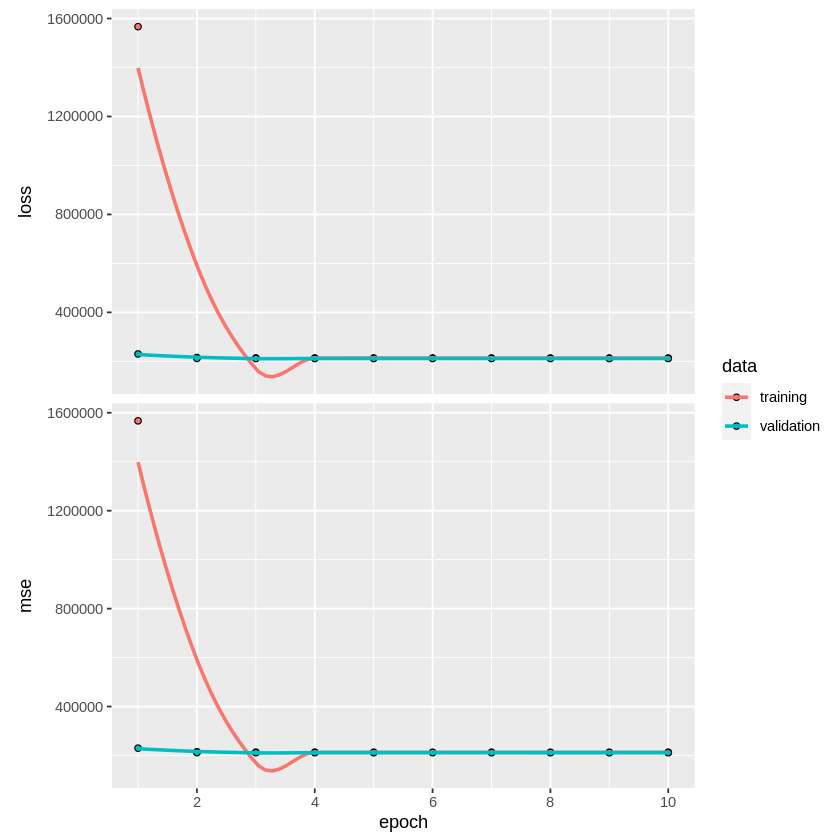

In [ ]:
plot(history)

In [ ]:
# Evaluamos el modelo Keras de los estimadores
metrics <- model %>% evaluate(X_train, y_train,)
metrics

loss      mse 
212899.1 212899.1

In [ ]:
# Hacemos predicciones sobre los datos de prueba
y_pred <- model %>% predict(X_test)
head(y_pred)

1592.605
1611.435
1594.454
1601.678
1633.456
1583.348


# 3.2 Evaluación del Modelo



In [ ]:
# Obtenemos las princiales métricas de la Regresión de los predictores

cat("MAE:", mae(y_test, y_pred))
cat("\nMSE:", mse(y_test, y_pred))
cat("\nRMSE:", rmse(y_test, y_pred))

MAE: 398.7753
MSE: 211581.8
RMSE: 459.9802